# Unit 7 Lecture 1 - Regression Analysis

CAI 4823: Artificial Intelligence for  Industrial Engineers<br>
University of Central Florida
Dr. Ivan Garibay, Ramya Akula, Mostafa Saeidi, Madeline Schiappa, and Brett Belcher. 

<h2>What is scikit-learn? </h2>
<p style="font-size: 16px">Scikit is a machine learning python library built off of packages you have recently been introduced to such as numpy, scipy and matplotlib. For more information, visit the <a href='http://scikit-learn.org/stable/index.html#'>scikit-learn homepage</a> or refer to the Python Data Science Handbook (VanderPlas, Jake) pages 343-359.
<p style="font-size: 16px">The library contains function in the following machine learning categories:
<li style="font-size: 16px"><a href='http://scikit-learn.org/stable/supervised_learning.html#supervised-learning'> Classification</a> </li>
<li style="font-size: 16px"><a href='http://scikit-learn.org/stable/supervised_learning.html#supervised-learning'> Regression </a></li>
<li style="font-size: 16px"><a href='http://scikit-learn.org/stable/modules/clustering.html#clustering'> Clustering </a></li>
<li style="font-size: 16px"><a href='http://scikit-learn.org/stable/modules/decomposition.html#decompositions'>Dimensionality Reduction</a></li>
<li style="font-size: 16px"><a href='http://scikit-learn.org/stable/model_selection.html#model-selection'>Model Selection</a></li>
<li style="font-size: 16px"><a href='http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing'>Preprocessing </a></li>

<p style="font-size: 16px">Scikit-learn should be installed along with your Anaconda3 installation. However, if this is not the case, follow the installation instructions provided by scikit-learn <a href='http://scikit-learn.org/stable/install.html'>here</a><br>
<p style="font-size: 16px">Next, lets import some of the packages we will use and see what version you are running!</p>

In [44]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
import pandas as pd
print('The pandas version is {}'.format(pd.__version__))
import matplotlib
import matplotlib.pyplot as plt
print('The matplotlib version is {}'.format(matplotlib.__version__))
import numpy as np
print('The numpy version is {}'.format(np.__version__))

The scikit-learn version is 1.5.1.
The pandas version is 2.2.2
The matplotlib version is 3.9.2
The numpy version is 1.26.4


## What is Linear Regression?
<p style="font-size: 16px">Linear regression is a type of linear model used to express the relation between the response $y\in\mathbb{R}^n$ and a combination of one ore more independent variables $x_i\in\mathbb{R}^n$. The response $y$ depends linearly on the $d$ variables $x_i$.

$$\mathbf{y} = a_0 + a_1\mathbf{x_1}+...+a_d\mathbf{x_d}$$

<li style="font-size: 16px">$y$ is the response variable</li>
<li style="font-size: 16px">$a_1...a_d$ are the <i>parameters</i><a name="cite_ref-1"></a><sup>[1]</sup> or <i>coefficients</i> of the model</li>
<li style="font-size: 16px">$x_1...x_d$ are the independent variables</li>
<br><p style="font-size: 16px">The matrix version of the equation is: $\mathbf{y}=\mathbf{X}\mathbf{w}$ where</p>
<br>
$$y=  \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}, 
X = \begin{pmatrix} x_{1,1} & \cdots & x_{1,d} \\ x_{2,1} & \cdots & x_{2,d} \\
& \vdots & \\x_{n,1} & \cdots & x_{n,d} \end{pmatrix}, 
w = \begin{pmatrix} a_1 \\ a_2 \\ \vdots \\ a_d \end{pmatrix}$$


<a name="cite_note-1"></a>[1] Note: the ChatGPT-4 model has approximately 1 trillion parameters.


## Simple Linear Regression

<p style="font-size: 16px">Simple linear regression consider n samples of a single varible $\mathbf{x}$ and describes the relationships between the variable and the response $\mathbf{y}$

$$\mathbf{y} = a_0 + a_1\mathbf{x}$$

<p style="font-size: 16px"> These coefficients are learned by minimizing the squared difference between the predicted values and the actual values, this is called the <i>sum of squared errors of prediction (SSE)</i>. This minimization is called the <i> ordinary least squares (OLS) estimator</i>.
$$\Vert a_0+a_1\mathbf{x}-\mathbf{y}\Vert^2=\sum_{j=1}^n(a_0+a_1x_j-y_j)^2$$


<p style="font-size: 16px"> The SSE posses a unique global minimum at 
   $\hat{\mathbf{w}} = (\hat{a_0}, \hat{a_1})$. The resulting model is represented as
    
$$\hat{\mathbf{y}} = \hat{a_0} + \hat{a_1}\mathbf{x}$$

<p style="font-size: 16px">where the hat variables represent that they are estimated (learned) from the data available.
</p>

# Sea Ice Data and Climate Change
This case scenario is interested in showing the effect of climate change by determining whether the sea ice area (or extent) has decreased over the years. **Sea ice area** is the total area covered by ice. **Sea ice extent** refers to the area of ocean with at least 15% sea ice.

In [160]:
#ice = pd.read_csv('../Data/SeaIce.txt', delim_whitespace=True)
ice = pd.read_csv('../Data/SeaIce.txt', sep=r'\s+') #split on one or more whitespace characters
print('shape: {}'.format(ice.shape))
ice

shape: (424, 6)


,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.54,12.33
1,1980,1,Goddard,N,14.96,11.85
2,1981,1,Goddard,N,15.03,11.82
3,1982,1,Goddard,N,15.26,12.11
4,1983,1,Goddard,N,15.10,11.92
...,...,...,...,...,...,...
419,2009,12,Goddard,N,12.51,10.25
420,2010,12,Goddard,N,12.02,10.08
421,2011,12,Goddard,N,12.40,10.28
422,2012,12,Goddard,N,12.20,10.11


<p style="font-size: 16px"><b><h2>1. Data Preperation</h2></b></p>
<p style="font-size: 16px">
Before we begin fitting a model, we will run a short analysis on the dataset. We will first start with visualizing the variables and the relationship they have with each other and the target variable. We will start with importing matplotlib's pyplot package for generating plots and format the figure size for inline visualization. We will also utilize the Seaborn package for visualization. Seaborn is a higher level package that uses matplotlib to create more statistical based visualizations and is better integrated with Pandas. Some features include:

<li style="font-size: 16px">Several built-in themes for styling matplotlib graphics</li>
<li style="font-size: 16px">Tools for choosing color palettes to make beautiful plots that reveal patterns in your data</li>
<li style="font-size: 16px">Functions for visualizing univariate and bivariate distributions or for comparing them between subsets of data</li>
<li style="font-size: 16px">Tools that fit and visualize linear regression models for different kinds of independent and dependent variables</li>
<li style="font-size: 16px">Functions that visualize matrices of data and use clustering algorithms to discover structure in those matrices</li>
<li style="font-size: 16px">A function to plot statistical timeseries data with flexible estimation and representation of uncertainty around the estimate</li>
<li style="font-size: 16px">High-level abstractions for structuring grids of plots that let you easily build complex visualizations</li>
<p style="font-size: 16px"><a href="https://seaborn.pydata.org/introduction.html#introduction">Click for more about seaborn</a>  or refer to Python Data Science Handbook (VanderPlas, Jake) pages 311-313.
    
<p style="font-size: 16px">First we will describe the data using pandas so we can see if there are any issues with the data. See if you notice anything odd in the table below.  </p>

In [50]:
print("Variables: ", ice.columns.values)
ice.describe()

Variables:  ['year' 'mo' 'data_type' 'region' 'extent' 'area']


,year,mo,extent,area
count,424.000000,424.000000,424.000000,424.000000
mean,1996.000000,6.500000,-35.443066,-37.921108
std,10.214716,3.474323,686.736905,686.566381
min,1978.000000,1.000000,-9999.000000,-9999.000000
25%,1987.000000,3.000000,9.272500,6.347500
50%,1996.000000,6.500000,12.385000,9.895000
75%,2005.000000,10.000000,14.540000,12.222500
max,2014.000000,12.000000,16.450000,13.840000


<p style="font-size: 16px"> As you can see from the above table, there are negative means and negative large numbers for the minimum values for both the extent and area, indicating some data preperation needs to occur before we can build our model.  Through visualization we can see the same issue. For more on matplotlib subplots, refer to Python Data Science Handbook (VanderPlas, Jake) pages 262-266.

Text(0.5, 1.0, 'by Month')

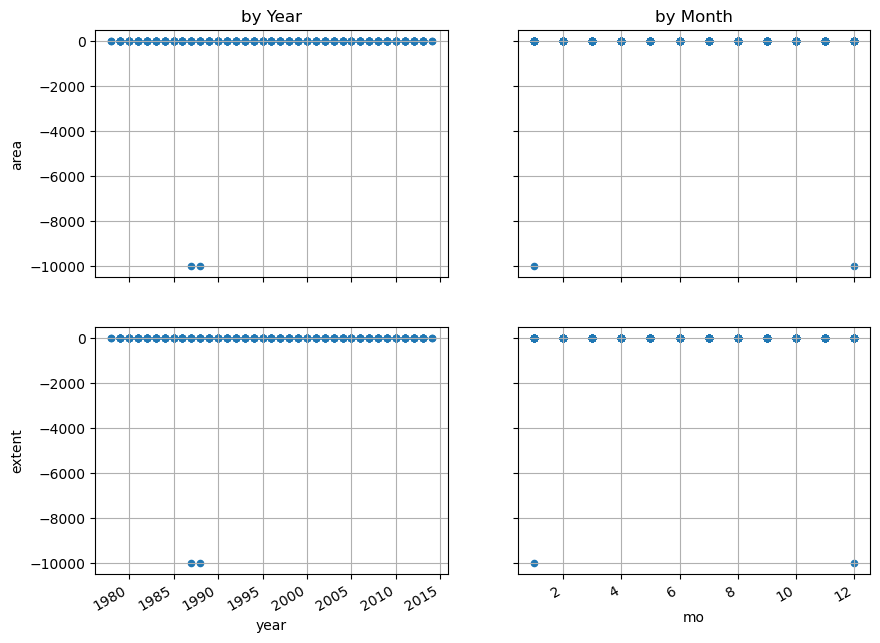

In [52]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
ice.plot.scatter(x='year', y='area', legend=False, sharex=False, sharey=True, ax=ax1, grid=True);
ice.plot.scatter(x='year', y='extent', legend=False, ax=ax3, grid=True)
ice.plot.scatter(x='mo', y='area',  legend=False, ax=ax2, grid=True)
ice.plot.scatter(x='mo', y='extent', legend=False, ax=ax4, grid=True)
fig.autofmt_xdate() #automatically format date ticklabels on an x-axis
ax1.set_title('by Year')
ax2.set_title('by Month')

Text(0.5, 1.0, 'Without Extreme Values')

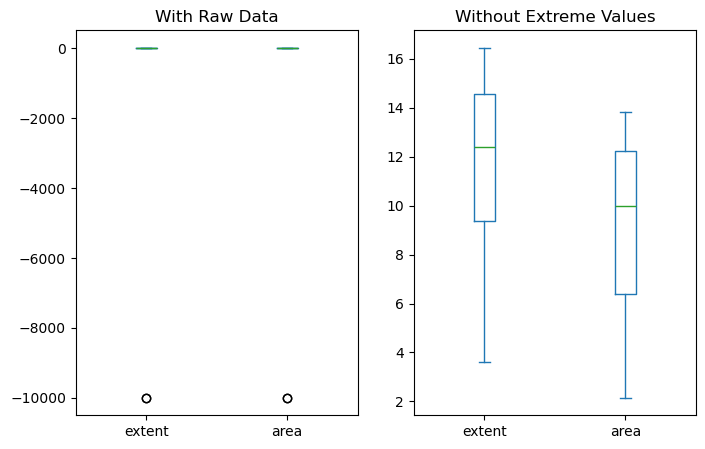

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,5))

#select all extent and area data, plot in subplot 1:
ice[['extent', 'area']].plot.box(ax=axes[0])

#select positive extent and area data only, plot in subplot 2:
ice.query('extent > 0 and area > 0')[['extent', 'area']].plot.box(ax=axes[1]) # this is removing the extreme values

#lable subplots
axes[0].set_title('With Raw Data') 
axes[1].set_title('Without Extreme Values')

<p style="font-size: 16px">From the above, we can see that if we removed the extreme values, we would havea fairly normal distribution for both variables. Now that we have investigated continuous variables, let us take a look at our categorical variable. 

In [55]:
ice['data_type'].value_counts()

data_type
Goddard    409
NRTSI-G     13
-9999        2
Name: count, dtype: int64

In [56]:
ice[(ice.data_type != 'Goddard') & (ice.data_type != 'NRTSI-G')]

,year,mo,data_type,region,extent,area
9,1988,1,-9999,N,-9999.0,-9999.0
397,1987,12,-9999,N,-9999.0,-9999.0


<p style="font-size: 16px">As can be seen, there are two extreme values that indicate missing values. Let's remove them and continue with our analysis.

Text(0.5, 1.0, 'by Month')

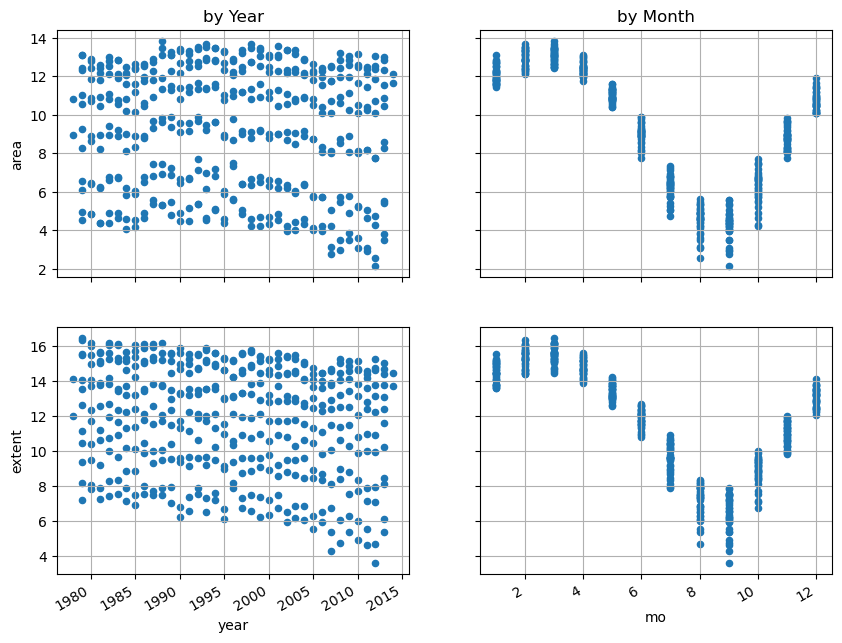

In [58]:
#clean data by removing extreme values
ice_cleaned = ice[ice['data_type'] != '-9999']

#plot cleaned data
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
ice_cleaned.plot.scatter(x='year', y='area', legend=False, sharex=False, sharey=True, ax=ax1, grid=True);
ice_cleaned.plot.scatter(x='year', y='extent', legend=False, ax=ax3, grid=True)
ice_cleaned.plot.scatter(x='mo', y='area',  legend=False, ax=ax2, grid=True)
ice_cleaned.plot.scatter(x='mo', y='extent', legend=False, ax=ax4, grid=True)
fig.autofmt_xdate()
ax1.set_title('by Year')
ax2.set_title('by Month')

<p style="font-size: 16px">From the plots you can see that by removing the extreme values from our categorical variable, it also removed them from our other two variables 'area' and 'extent'. We can now proceed further with our analysis by visualizing potential linear relationships. For more on using seaborn, 

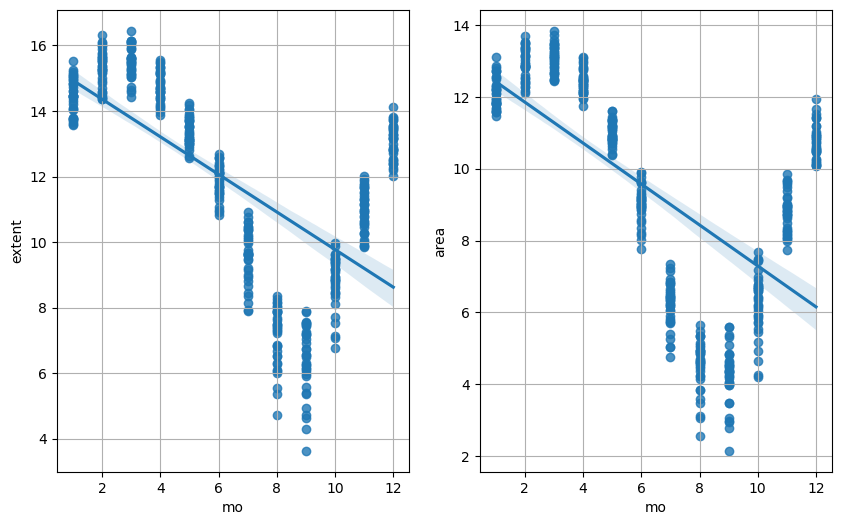

In [60]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,6))
sns.regplot(x=ice_cleaned['mo'], y=ice_cleaned['extent'], ax=ax1)
ax1.grid(True)
plot_ = sns.regplot(x=ice_cleaned['mo'], y=ice_cleaned['area'], ax=ax2)
ax2.grid(True)

<p style="font-size: 16px">From the plots we observe fluctuations over time, indicating we should normalize the data: 
$$e_j^{-i}=100*\frac{e_j^{-i}-\mu_i}{\mu}, i=1,...,12.$$
<li style="font-size: 16px">$u_i$ mean of the i-th interval of time (month)</li>
<li style="font-size: 16px">$e_j^i$ set of independent variable values for that month</li>
<li style="font-size: 16px">$\mu$ total mean, used to convert the final value to a relative percent difference</li>

In [62]:
#######
#grouped = ice_cleaned.groupby('mo')  # group by first so do not have to run multiple group by computations
#month_means = grouped.extent.mean()
#print("month_means: ", month_means)
#month_mean = month_means.mean()
#print("month_mean: ", month_mean)
#ice_cleaned = ice_cleaned.assign(n_extent = grouped.extent.apply(lambda x: 100*((x-x.mean())/month_mean)))
#month_means = grouped.area.mean()
#month_mean = month_means.mean()
#ice_cleaned = ice_cleaned.assign(n_area = grouped.area.apply(lambda x: 100*((x-x.mean())/month_mean)))
#ice_cleaned
########
# --- Grouping setup ---
grouped = ice_cleaned.groupby('mo')  # keep your grouping

# --- Ensure numeric dtypes for the source columns (avoid 'object' buffers) ---
ice_cleaned = ice_cleaned.copy()  # in case ice_cleaned is a view from an earlier slice
ice_cleaned['extent'] = pd.to_numeric(ice_cleaned['extent'], errors='coerce')
ice_cleaned['area']   = pd.to_numeric(ice_cleaned['area'],   errors='coerce')

# --- Normalized extent ---
# per-group mean for each row (aligned Series)
extent_mean_by_group = grouped['extent'].transform('mean')
# overall (global) mean of the per-group means, as scalar float
extent_global_mean = float(extent_mean_by_group.mean())

ice_cleaned['n_extent'] = (
    100.0 * (ice_cleaned['extent'] - extent_mean_by_group) / extent_global_mean
).astype('float64')

# --- Normalized area ---
area_mean_by_group = grouped['area'].transform('mean')
area_global_mean = float(area_mean_by_group.mean())

ice_cleaned['n_area'] = (
    100.0 * (ice_cleaned['area'] - area_mean_by_group) / area_global_mean
).astype('float64')

ice_cleaned


,year,mo,data_type,region,extent,area,n_extent,n_area
0,1979,1,Goddard,N,15.54,12.33,9.005001,2.276413
1,1980,1,Goddard,N,14.96,11.85,4.080391,-2.891659
2,1981,1,Goddard,N,15.03,11.82,4.674740,-3.214664
3,1982,1,Goddard,N,15.26,12.11,6.627603,-0.092287
4,1983,1,Goddard,N,15.10,11.92,5.269090,-2.137982
...,...,...,...,...,...,...,...,...
419,2009,12,Goddard,N,12.51,10.25,-4.665037,-5.441857
420,2010,12,Goddard,N,12.02,10.08,-8.825483,-7.272216
421,2011,12,Goddard,N,12.40,10.28,-5.599014,-5.118852
422,2012,12,Goddard,N,12.20,10.11,-7.297156,-6.949211


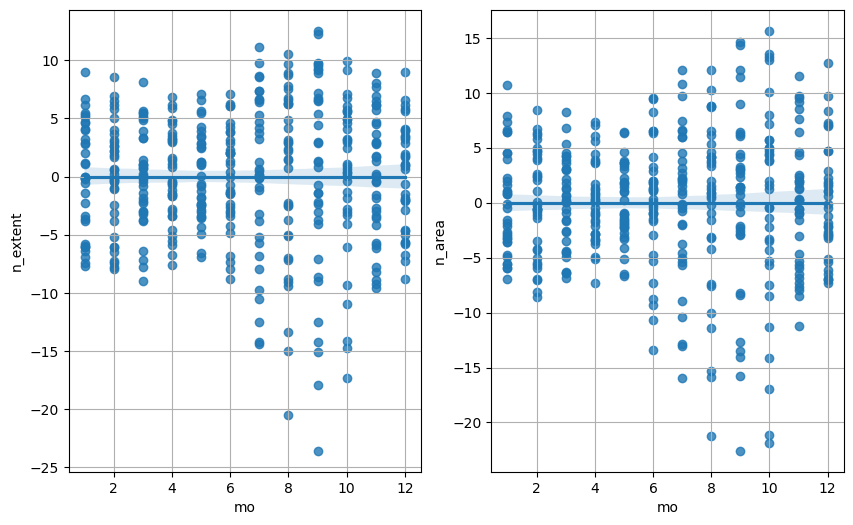

In [63]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,6))
sns.regplot(x=ice_cleaned['mo'], y=ice_cleaned['n_extent'], ax=ax1)
ax1.grid(True)
sns.regplot(x=ice_cleaned['mo'], y=ice_cleaned['n_area'], ax=ax2)
ax2.grid(True)

<p style="font-size: 16px">From the plots you see that we successfully normalized the values in accordance to the monthly fluctuations. Let's visualize this now over the course of years.</p>

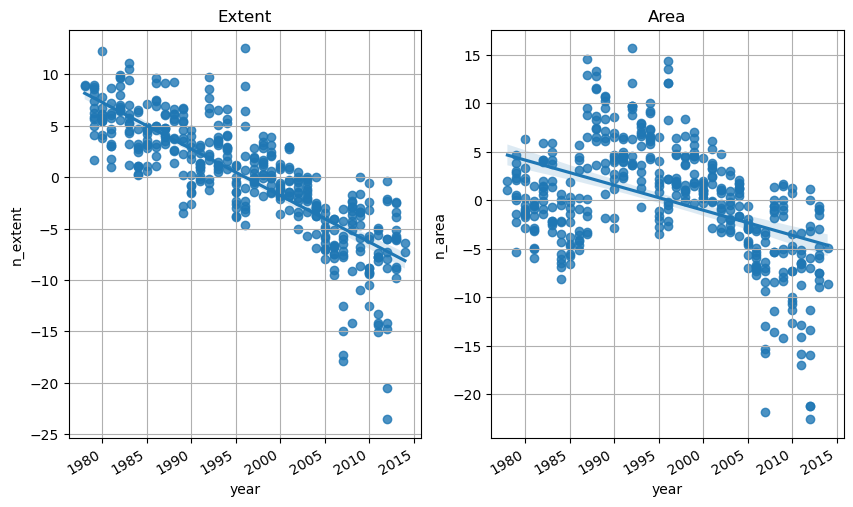

In [65]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,6))
sns.regplot(x=ice_cleaned['year'], y=ice_cleaned['n_extent'], ax=ax1)
ax1.grid(True)
sns.regplot(x=ice_cleaned['year'], y=ice_cleaned['n_area'], ax=ax2)
ax2.grid(True)
ax1.set_title('Extent')
ax2.set_title('Area')
fig.autofmt_xdate()

<p style="font-size: 16px">From the plots we can see a downward trend that could be attributed to global warming. Next we build a regression model.</p>


<h2>2. Fitting the Model</h2>

<p style="font-size: 16px">To fit the model, we will use sklearn's object oriented interface. Firstly we create an object, which we name 'model'. We then can use the <code>model.fit</code> method to set the state of the object based on the training data. The data passed to the method must be in a two dimensional numpy array $\mathbf{X}$ of shape (n samples, d predictors) holding the feature matrix and a one-dimensinal numpy array $\mathbf{y}$ that holds the response variable values. To view the documentaiton on this method, <a href='http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html'>visit here</a>.</p>

<p style="font-size: 16px">Once you have fit the model using the appropriate parameters passed to the fit method, the new state of the model object is stored in instances attributes with a trailing underscore '_' (i.e. <code>model.coefficients_</code>, <code>model.intercept_</code>, etc.).</p>

<p style="font-size: 16px">Estimator objects that can generate predictions by using the <code>model.predict </code> method. In the case of regression, model.predict will return the predicted regression values, $\hat{\mathbf{y}}$.

<p style="font-size: 16px">We will start with fitting extent onto year. Using a subset of the data to train and a subset to test the model.</p>

Coefficients (a_1)=  [[-0.45250669]]

Intercept (a_0)=  [903.22158262]


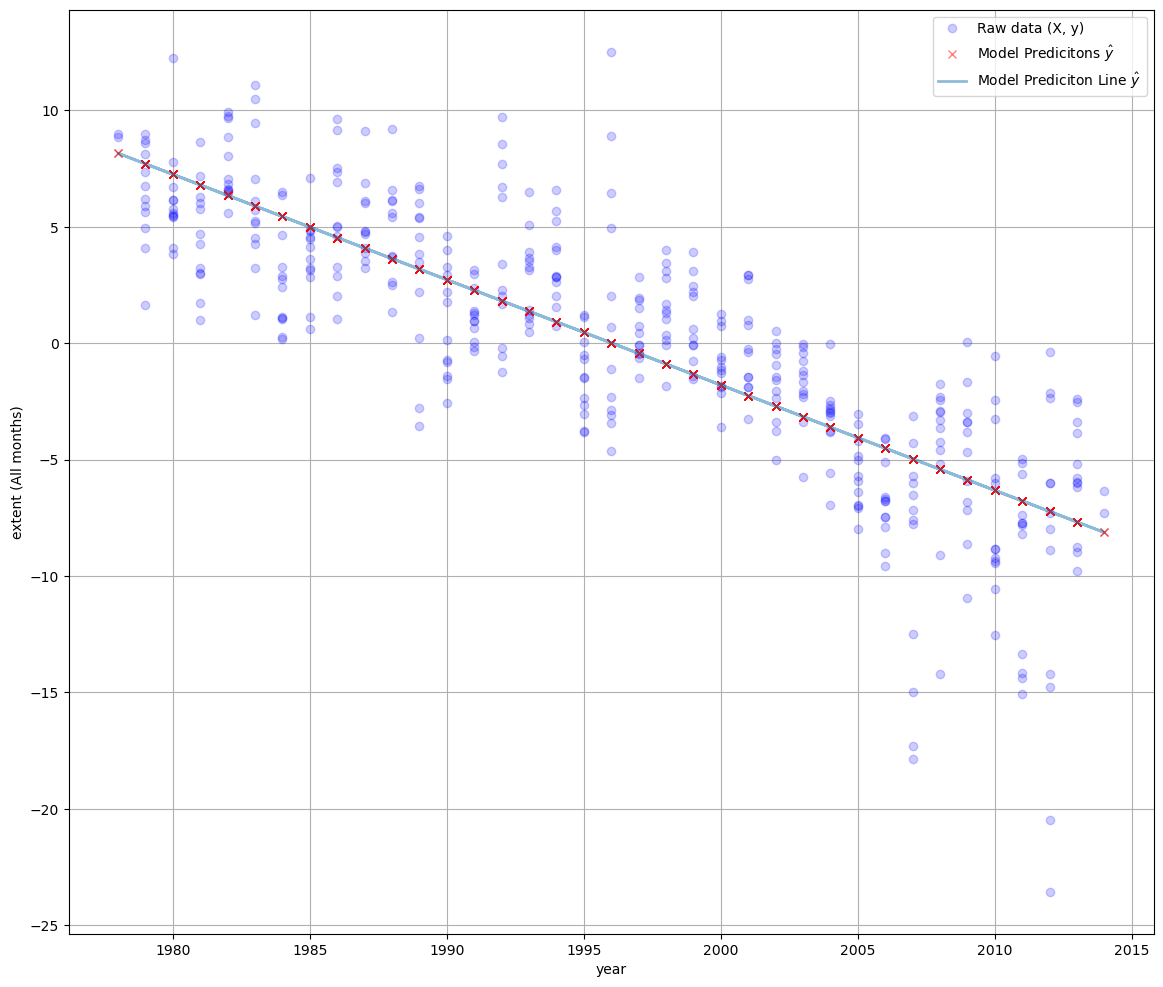

In [156]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = ice_cleaned[['year']].to_numpy() #extract from Dataframe and convert to Numpy Array
y = ice_cleaned[['n_extent']].to_numpy()

# Create linear regression object
model = linear_model.LinearRegression()

# Train the model using the training sets
model.fit(X, y)

# Make predictions using the testing set
y_pred = model.predict(X)

print("Coefficients (a_1)= ", model.coef_)
print("\nIntercept (a_0)= ", model.intercept_)

# Plot outputs
plt.figure(figsize=(14,12))
plt.plot(X, y,'bo', alpha = 0.2, label=r"Raw data (X, y)")
plt.plot(X, y_pred, 'rx', alpha = 0.5, label=r"Model Predicitons $\hat{y}$")
plt.plot(X, y_pred, linewidth=2, alpha = 0.5, label=r"Model Prediciton Line $\hat{y}$")
plt.xlabel('year')
plt.ylabel('extent (All months)')
plt.legend()
plt.grid(True)

<p style="font-size: 18px"><b>Evaluating the Model</b></p>
<p style="font-size: 16px"><b>R-Squared</b>
<p style="font-size: 16px">Now that we have a fit model, it is time to interpret how accurate the model represents the data. The main method for measuring accuracy of the model is through the R-squared value. The R-squared value measures the closeness of the data to the fitted regression line and is the percentage of variance of the response variable that is explained by the linear model. The value is calculated by calculating the total variance and the unexplained variance. The formulas to accomplish this are below:</p>

<p style="font-size: 16px"><i>Total Sum of Squares</i>, or the total variation in the response variable: $SS_{tot} = \sum_i(y_i - \bar{y})^2$
<p style="font-size: 16px"><i>Explained Sum of Squares</i>, or how much of the response variable was exaplained by our model: $SS_{reg} = \sum_i(\hat{y} - \bar{y})^2$
<p style="font-size: 16px"><i>Residual Sum of Squares</i>, or how much of the response variable was not explained by our model: $SS_{res} = \sum_i(y_i - \hat{y})^2$
<p style="font-size: 16px"><i>R-squared or Coefficient of determination:</i> $\displaystyle R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$


<p style="font-size: 16px">Where $\displaystyle \hat{y}$ is the predicted value by our model.<br><br>
By looking at the R-squared equation, it can be more easily seen that its inverse represents a fraction of the total variance that is unexaplained.
    
$\displaystyle R^2 = 1 : best fit possible$
    
$\displaystyle R^2 = 0 : worst fit possible$    

In [71]:
print("R-Squared : {}".format(r2_score(y, y_pred)))

R-Squared : 0.6696968386888753


<p style="font-size: 16px"><b>Mean Squared Error</b>
<p style="font-size: 16px">Another metric that is commonly used is the Mean Squared Error:</p>
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(Y_i - \hat{Y_i})^2$$

<br><p style="font-size: 16px">This metric measures the average squared difference between the predicted value and the actual value. The closer to 0 the better!</p>

In [73]:
print("Mean Squared Error: {}".format(mean_squared_error(y, y_pred)))

Mean Squared Error: 10.527593640488208


<p style="font-size: 16px">Below is a summary of our result. The results indicate that approximately 50% of the variance in the response variable is explained by our model. Let's see if we can improve this with using another predictor variable or including several. 

In [75]:
pd.DataFrame(data={'mean squared error (MSE)': mean_squared_error(y, y_pred), 
                   'R-squared': r2_score(y, y_pred), 'Variance': y.var() }, index=['Results'])

,mean squared error (MSE),R-squared,Variance
Results,10.527594,0.669697,31.872519


## 3. Using the Model to Predict
Now let us the model to predit the **sea ice extent** in January 2025

In [77]:
x = [[2025]]
y_hat = model.predict(x)
m = 1 #January

#denormalizing month
y_hat2=(y_hat*month_means.mean()/100)+month_means[m]

print("Raw Prediction= ",y_hat)

print("Prediction of sea ice extend for January 2025 (in millions of square Kilometers)= ",y_hat2)


Raw Prediction=  [[-13.10446507]]
Prediction of sea ice extend for January 2025 (in millions of square Kilometers)=  [[12.93688439]]


<p style="font-size: 18px"><b>Fitting the Model on One Month</b></p>

Coefficients (a_1)=  [[-0.40111958]]

Intercept (a_0)=  [800.93265479]


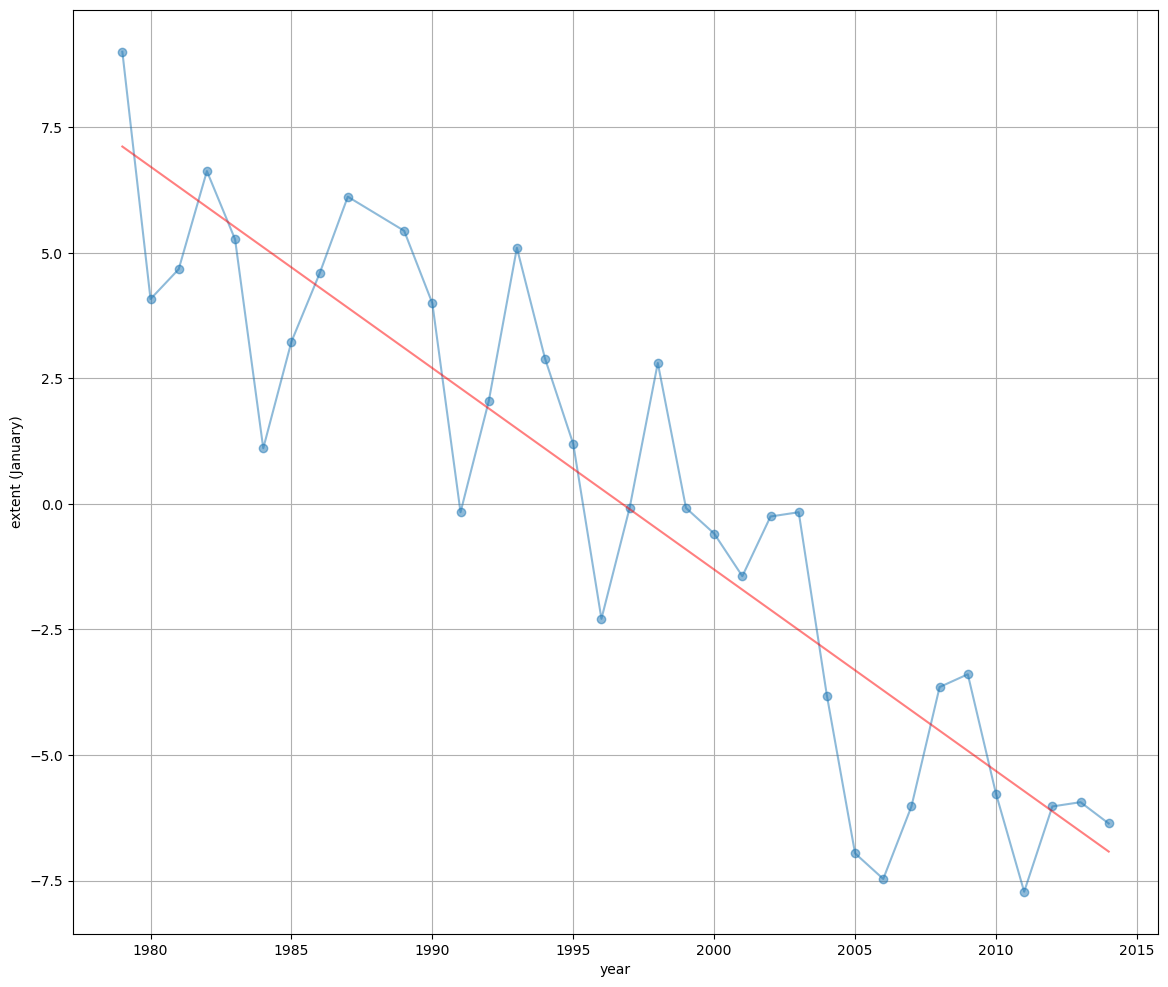

In [79]:
jan_ice = ice_cleaned[ice_cleaned.mo == 1]
X_jan = jan_ice[['year']].to_numpy()
y_jan = jan_ice[['n_extent']].to_numpy()

model_jan = linear_model.LinearRegression()
model_jan.fit(X_jan, y_jan)
y_jan_pred = model_jan.predict(X_jan)

print("Coefficients (a_1)= ", model_jan.coef_)
print("\nIntercept (a_0)= ", model_jan.intercept_)

fig = plt.figure(figsize=(14,12))
plt.plot(X_jan, y_jan,'-o', alpha = 0.5)
plt.plot(X_jan, y_jan_pred, 'r', alpha = 0.5)
plt.xlabel('year')
plt.ylabel('extent (January)')
plt.grid(True)

In [80]:
pd.DataFrame(data={'mean squared error (MSE)': mean_squared_error(y_jan, y_jan_pred), 
                   'R-squared': r2_score(y_jan, y_jan_pred),'Variance': y_jan.var() }, index=['Results'])

,mean squared error (MSE),R-squared,Variance
Results,3.835313,0.820387,21.353244


<h2>Multi-linear Regression</h2>
<p style="font-size: 16px">The above equation only uses one feature to predict the output, but it is possible to use several features as predictors. This would result in several coefficients. 

$$Y_i = a_0 + a_1x_1+a_2x_2+a_3x_3+...+a_nx_n+\epsilon_i$$ 

<br><p style="font-size: 16px">The coefficients in this scenario mean that for every 1 increase in $X_n$, the target variable increases by $\beta_n$ <b>holding all other variables constant.</b> The method of fitting the model is the same as before however.</p>

<h2>Polynomial Regression</h2>
<p style="font-size: 16px">A polynomial regression model models the relationship between the response and the variables as an p-th order polynomial.

Igual, Laura. Introduction to Data Science: A Python Approach to Concepts, Techniques and Applications (Undergraduate Topics in Computer Science) (Kindle Location 2075). Springer International Publishing. Kindle Edition. 
$$Y_i = a_0 + a_1\phi(x_1)+a_2\phi(x_2)+a_3\phi(x_3)+...+a_n\phi(x_n)+\epsilon_i$$ <p style='font-size: 16px'>where $\phi(\bullet)$ are non-linear transformations of $x$

<p style="font-size: 16px">Lets read some data in!</p>

<h2>Housing Data</h2>
<p style="font-size: 16px">For this example we will use a dataset provided by sklearn and also available at <a href='https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset/notebook'>Kaggle: Boston Housing</a>. There are seven toy datasets available to use for various types of modeling listed and described <a href="http://scikit-learn.org/stable/datasets/index.html">here</a>. The dataset we will be using is about the boston housing market and is stored in a dictionary object with the keys 'data' and 'target' with each containing arrays of values 13 dimensions. The task is to find a predictive model for median value of owner-occupied homes (MEDV) based on the 12 predictor variables. 
<p style="font-size: 16px">Data Set Characteristics</p>
<table style="font-size: 16px">
    <tr>
        <td>Number of Instances</td>
        <td>506</td>
    </tr>
    <tr>
        <td>Number of attributes</td>
        <td>13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.</td>
    </tr>
    <tr>
        <td>Attribute Information (in order)</td>
        <td>
            <li>CRIM : per capita crime rate by town</li>
            <li>ZN : Proportion of residential land zoned for lots over 25,000 sq.ft</li>
            <li>INDUS : proportion of non-retail business acres per town</li>
            <li>CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</li>
            <li>NOX : nitric oxides concentration (parts per 10 million)</li>
            <li>RM : average number of rooms per dwelling</li>
            <li>AGE : proportion of owner-occupied units built prior to 1940</li>
            <li>DIS : weighted distances to five Boston employment centres</li>
            <li>RAD : index of accessibility to radial highways</li>
            <li>TAX : full-value property-tax rate per 10,000 dollars</li>
            <li>PTRATIO : pupil-teacher ratio by town</li>
            <li>B : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town</li>
            <li>LSTAT : % lower status of the population</li>
            <li>MEDV : Median value of owner-occupied homes in 1000 dolllars</li>
        </td>
    </tr>
    <tr>
        <td>Missing Attribute Values</td>
        <td>None</td>
    </tr>
    <tr>
        <td>Creator</td>
        <td>Harrison, D. and Rubinfeld, D.L.</td>
    </tr>
</table>
<p style="font-size: 16px"> For more information visit the sklearn <a href='https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/boston_house_prices.rst'>github documentation</a></p>

The data file looks like this. **Do you spot any problems?**
<img src='../Data/boston_housing.png'>

In [158]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None) ##22 first rows are not data

#print to assist in understanding the code
print("==========")
print(raw_df)
print("==========")
print(raw_df.values[::2, :]) #select all even rows, all columns
print("==========")
print(raw_df.values[1::2, :2]) #select all odd rows, columns 0 and 1
print("==========")
print(raw_df.values[1::2, 2]) #select all odd rows, column 2 
print("==========")

#boston_data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])
#boston_target = raw_df.values[1::2, 2]

boston_data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]) # X matrix
boston_target = raw_df.values[1::2, 2] # y vector

boston_feature_names = [
 "CRIM",     #per capita crime rate by town
 "ZN",       #proportion of residential land zoned for lots over 25,000 sq.ft.
 "INDUS",    #proportion of non-retail business acres per town
 "CHAS",     #Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 "NOX",      #nitric oxides concentration (parts per 10 million)
 "RM",       #average number of rooms per dwelling
 "AGE",      #proportion of owner-occupied units built prior to 1940
 "DIS",      #weighted distances to five Boston employment centres
 "RAD",      #index of accessibility to radial highways
 "TAX",      #full-value property-tax rate per $10,000
 "PTRATIO",  #pupil-teacher ratio by town
 "B",        #1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 "LSTAT"    #% lower status of the population
 #"MEDV"     #Median value of owner-occupied homes in $1000's
]

X_boston,y_boston = boston_data, boston_target
print ('::>Shape of data:', X_boston.shape, y_boston.shape)
print ('::>Feature names:',boston_feature_names, len(boston_feature_names))
boston_data

print('::>One row of predictor variables: {}'.format(boston_data[0]))
print('::>One row of response variable: {}'.format(boston_target[0]))

             0      1      2    3      4      5     6       7    8      9   \
0       0.00632  18.00   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1     396.90000   4.98  24.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
2       0.02731   0.00   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
3     396.90000   9.14  21.60  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
4       0.02729   0.00   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
...         ...    ...    ...  ...    ...    ...   ...     ...  ...    ...   
1007  396.90000   5.64  23.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1008    0.10959   0.00  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
1009  393.45000   6.48  22.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1010    0.04741   0.00  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0   
1011  396.90000   7.88  11.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   

        10  
0     15.3  
1      NaN  
2     17.8  
3      NaN 

<p style="font-size: 16px">Although this format is difficult to visualize, it is the ideal format for input into sklearn <code>.fit</code> functions. To help visualize the data, we can reformat it and read it into a pandas dataframe. We create a dataframe by using <code>boston_data</code> (matrix) and then adding the <code>boston_target</code> (vector) data as a new column named 'PRICE'. The target variable ('PRICE') in this scenario is the MEDV (median value of owner-occupied homes in 1000 dollars).

In [86]:
df_boston = pd.DataFrame(data=boston_data, columns=boston_feature_names)
df_boston['PRICE'] = boston_target
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<p style="font-size: 16px">We will now use pandas to describe our dataset.

In [88]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<p style="font-size: 16px">We can also use pandas for visualizations. Some examples of these can be found in <a href='https://pandas.pydata.org/pandas-docs/stable/visualization.html'>pandas visualization documentation.</a> Below we use this method to create box plots for our variables, including the target. Through this visualization we can see which continuous variables are skewed or normal. This may prove useful for determining which continuous variables need transformations such as a log transformation.</p>
<p style="font-size: 16px"></p>

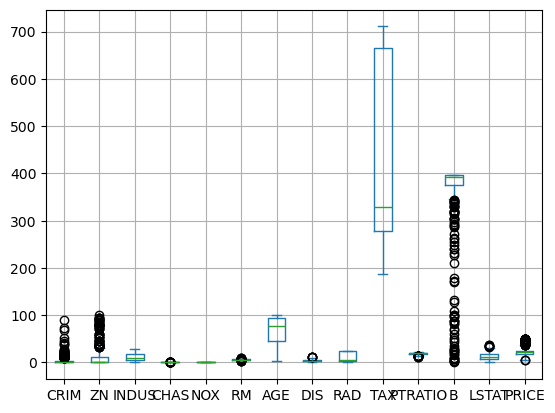

In [90]:
plot_ = df_boston.plot.box(grid=True)

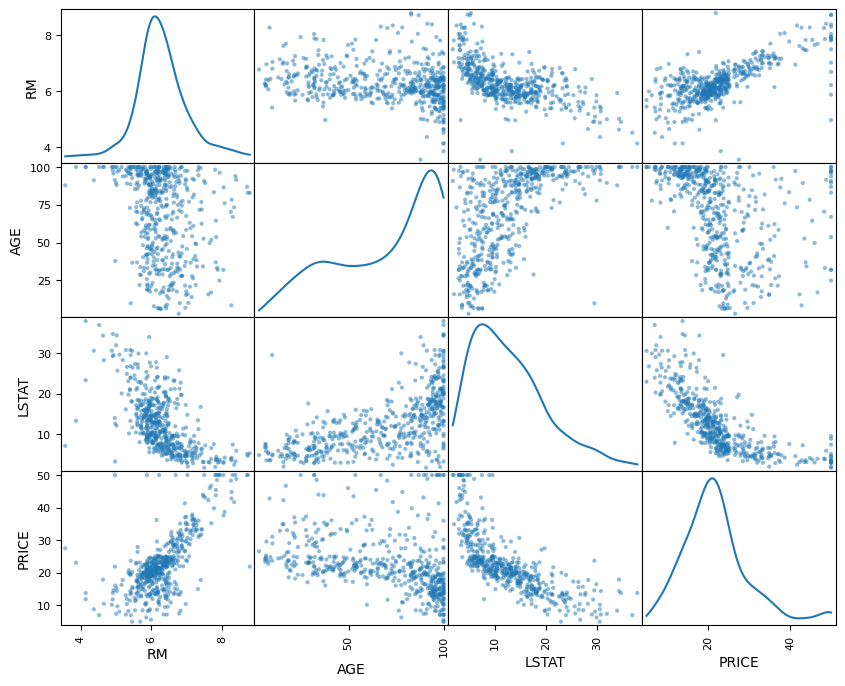

In [91]:
from pandas.plotting import scatter_matrix
scatter_  = scatter_matrix(df_boston[['RM', 'AGE', 'LSTAT', 'PRICE']], diagonal='kde', figsize=(10, 8))

<p style="font-size: 16px">Above is a scatter plot matrix, visualizing the relationship between all the variables. The strength of the relationship between two variables, or correlation, can be interpreted by the individual scatter plots. The more linear the points, the stronger the relationship. This is helpful for gauging potential issues with multicollinearity. Multicollinearity is when two predictor variables are highly correlated, resulting in erratically changing coefficiants to small changes in data.<br><br>Next we can look at the actual correlation values between the variables using pandas:</p>

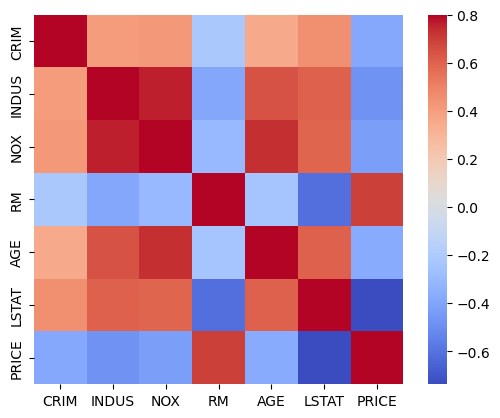

In [93]:
df_boston_corr = df_boston[['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'LSTAT', 'PRICE']].corr(method='pearson')
plot_ = sns.heatmap(df_boston_corr, vmax = .8, square = True, cmap="coolwarm")

<p style="font-size: 16px">From the above table, we see that LSTAT (percent lower status of the population) has the strongest relationship with price second by RM. We also see that LSTAT and RM (average number of rooms per dwelling) are highly correlated with each other.</p> 
<p style="font-size: 16px">Now let's use seaborn to visualize linear relationships between some of the variables</p>

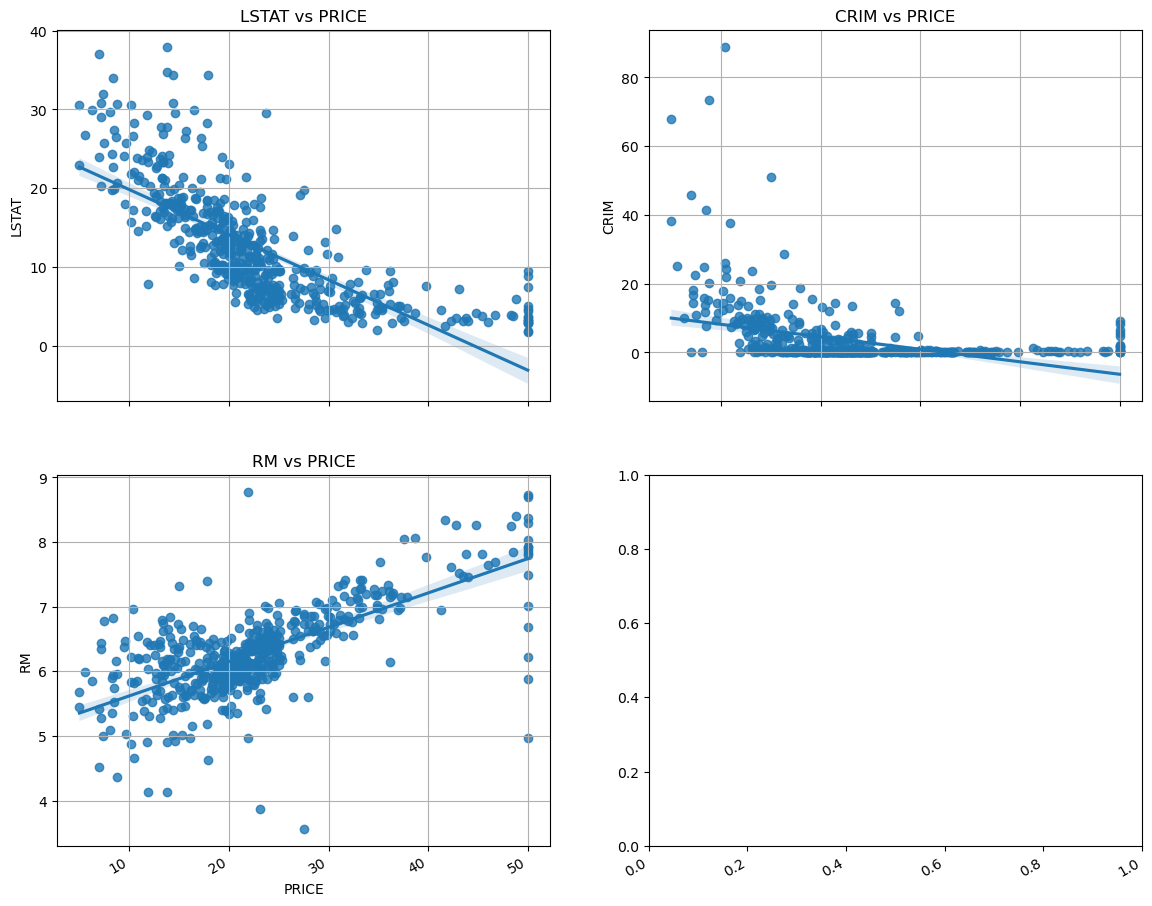

In [95]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14,12))
sns.regplot(x=df_boston['PRICE'], y=df_boston['LSTAT'], ax=ax1);
sns.regplot(x=df_boston['PRICE'], y=df_boston['RM'], ax=ax3)
sns.regplot(x=df_boston['PRICE'], y=df_boston['CRIM'], ax=ax2)
fig.autofmt_xdate()
ax1.set_title('LSTAT vs PRICE')
ax1.grid(True)
ax2.set_title('CRIM vs PRICE')
ax2.grid(True)
ax3.set_title('RM vs PRICE')
ax3.grid(True)

<p style="font-size: 16px">In the plot for LSTAT, it can be seen that the relationship is non-linear, indicating we should evaluate higher order terms to improve the fit of the model. An example of an order two would be $y_i\approx a_0+a_1\mathbf{x_i}+a_2\mathbf{x_i^2}$.</p> 

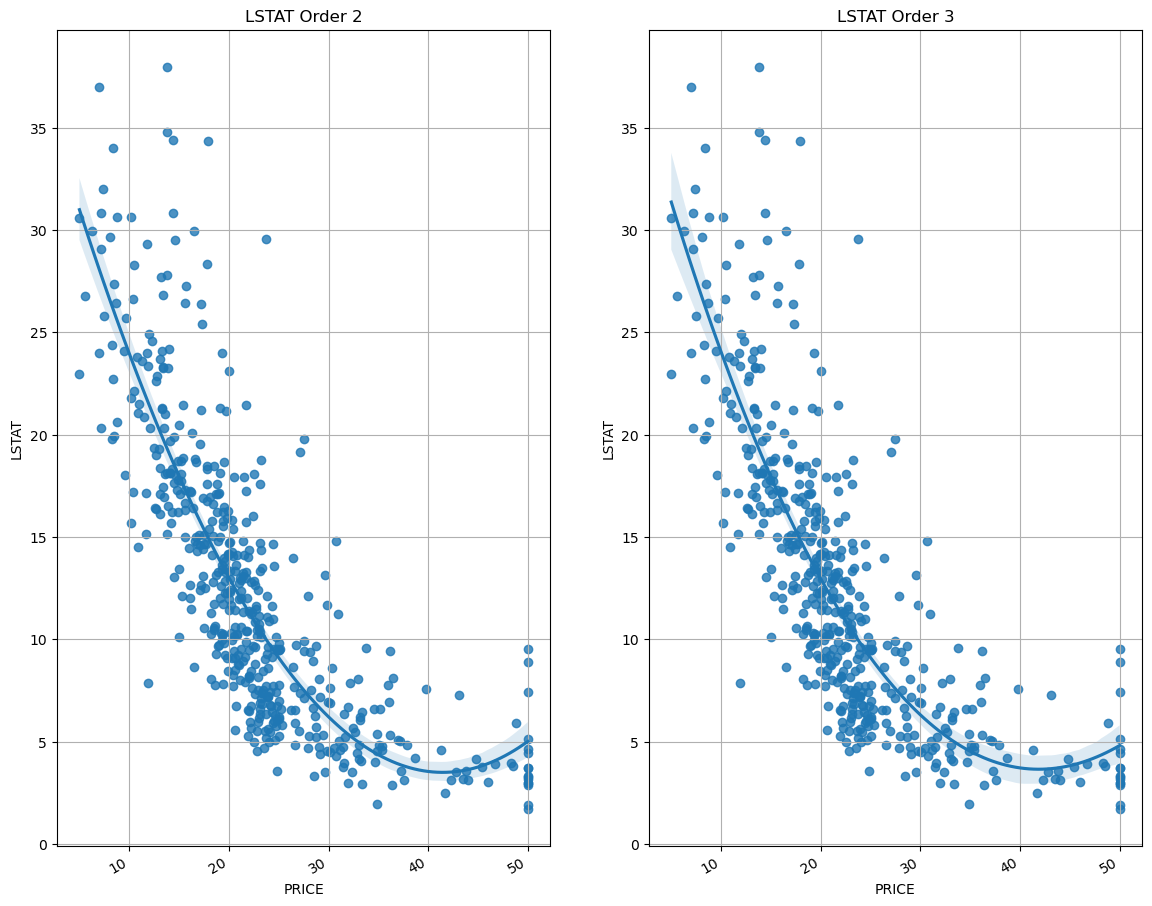

In [97]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,12))
sns.regplot(x=df_boston['PRICE'], y=df_boston['LSTAT'], order=2, ax=ax1);
sns.regplot(x=df_boston['PRICE'], y=df_boston['LSTAT'], order=3, ax=ax2)
fig.autofmt_xdate()
ax1.set_title('LSTAT Order 2')
ax1.grid(True)
ax2.set_title('LSTAT Order 3')
ax2.grid(True)

<p style="font-size: 16px">As can be seen, the relationship is non-linear and can better be represented using higher order terms.</p>

<h2>Fitting the Model</h2>

In [100]:
from sklearn import datasets
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = boston_data
y = boston_target

# Split the data into training/testing sets
train_size = int(boston_data.shape[0]/2) #half of the data for training

X_train = boston_data[:train_size]
X_test = boston_data[train_size:]
y_train = boston_target[:train_size]
y_test = boston_target[train_size:]

# If you want to randomize your selection, try the function below in the future:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)  

# Create linear regression object
linear_model = lm.LinearRegression()

# Train the model using the training sets
linear_model.fit(X_train, y_train)

# Make predictions using the training and the testing sets
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)


coefficients = dict()
for idx, col in enumerate(df_boston.columns[:-1]):
    coefficients[col] = linear_model.coef_[idx]
pd.DataFrame(data=coefficients, index=['Coeff'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
Coeff,1.201333,0.024497,0.009995,0.425487,-8.442723,8.877672,-0.048504,-1.119809,0.203776,-0.015977,-0.659748,0.017771,-0.114801


In [101]:
linear_r2 = r2_score(y_test, y_pred_test)
pd.DataFrame(data={'train':{'mean squared error': mean_squared_error(y_train, y_pred_train),
                         'r-squared': r2_score(y_train, y_pred_train)},
                        'test':{'mean squared error': mean_squared_error(y_test, y_pred_test),
                         'r-squared': linear_r2}})

,train,test
mean squared error,9.987517,303.436863
r-squared,0.855783,-2.252734


<p style="font-size: 16px">We can see that all the coefficients obtained are different from zero, meaning that no variable is discarded. Next, we try to build a sparse model to predict the price using the most important factors and discarding the non-informative ones. To do this, we can create a LASSO regressor, forcing zero coefficients.</p>

<h2>What is a Sparse Model?</h2>
<p style="font-size: 16px">Sparse models, i.e. <i>Lasso</i> (least absolute shrinkage and selection operator) model, use a penalty factor to remove uninformative variables by setting them to 0. Uninformative variables are detrimental to performance because they contribute to confuse the model. Given $(\mathbf{X},\mathbf{y})$, the objective of the sparse model is to minimize: </p>
$$\frac{1}{2n}\Vert \mathbf{X}\mathbf{w}-\mathbf{y}\Vert_2^2 + a\Vert\mathbf{w}\Vert_1$$
<p style="font-size: 16px">where $\Vert\mathbf{w}\Vert_1$ is the <i>L1-norm</i> (manhattan distance) of the parameter vector $\mathbf{w}=(a_0,...,a_d)$
<p style='font-size: 16px'>We will use sklearn's linear model Lasso to fit a sparse model. For more documentation on Lasso <a href='http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html'>click here</a>.</p>

In [104]:
lasso_model = lm.Lasso(alpha=.3) # alpha=0 (lasso inactive), 
                                 # alpha>0 lasso penalty active,
                                 # alpha=1 lasso penalty at maximum
lasso_model.fit(X_train, y_train) 

y_pred_train = lasso_model.predict(X_train)
y_pred_test = lasso_model.predict(X_test)
lasso_r2 = r2_score(y_test, y_pred_test)
print("The r-squared improved by {}".format(lasso_r2 - linear_r2))
pd.DataFrame(data={'train':{'mean squared error': mean_squared_error(y_train, y_pred_train),
                         'r-squared': r2_score(y_train, y_pred_train)},
                        'test':{'mean squared error': mean_squared_error(y_test, y_pred_test),
                         'r-squared': r2_score(y_test, y_pred_test)}})

The r-squared improved by 2.753861871413764


,train,test
mean squared error,10.734311,46.538168
r-squared,0.844999,0.501128


In [105]:
coefficients = dict()
for idx, col in enumerate(df_boston.columns[:-1]):
    coefficients[col] = lasso_model.coef_[idx]
pd.DataFrame(data=coefficients, index=['Coeff'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
Coeff,0.0,0.019965,-0.0,0.0,-0.0,7.698947,-0.034448,-0.793806,0.073516,-0.014342,-0.667685,0.015474,-0.221818


<h2>Evaluating Predictor Variables</h2>
<p style="font-size: 16px">From the coefficients you see that some of the variables were penalized and found not meaningful. We see that removing this variables improved our r-squared score compared to the linear regression model. </p>

In [107]:
import operator
indexes_kept = list()
indexes_rm = list()
for col, coef in coefficients.items():
    if coef > 0 or coef < 0:
        indexes_kept.append(col)
    else:
        indexes_rm.append(col)
print('Non important variable:', indexes_rm)

# Remember we stored our coefficients in a dictionary, using the operator package, we can get the key of the max value in the dict
print('Most important variable:', max(coefficients.items(), key=operator.itemgetter(1))[0])

Non important variable: ['CRIM', 'INDUS', 'CHAS', 'NOX']
Most important variable: RM


In [108]:
print("Coefficients from least effective to most:", sorted(coefficients.items(), key=lambda kv: np.abs(kv[1])))

Coefficients from least effective to most: [('CRIM', 0.0), ('INDUS', -0.0), ('CHAS', 0.0), ('NOX', -0.0), ('TAX', -0.014342104687754697), ('B', 0.015474372612047668), ('ZN', 0.01996511752146361), ('AGE', -0.03444803494481025), ('RAD', 0.0735163012622484), ('LSTAT', -0.22181817102948193), ('PTRATIO', -0.6676853901735551), ('DIS', -0.7938063616852047), ('RM', 7.698947438481804)]


<p style="font-size: 16px">With sklearn, there are packages that help us pick the best variables to train on.</p>

In [110]:
import sklearn.feature_selection as fs 
selector = fs.SelectKBest(score_func = fs.f_regression, k = 5)
selector.fit_transform(X_train, y_train)

selector_ = dict()
for supp, col in zip(selector.get_support(), boston_feature_names):
    selector_[col] = supp
pd.DataFrame(selector_, index=['Results'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
Results,False,False,True,False,False,True,True,False,False,False,True,False,True


In [111]:
print("Variables Kept:", [col for col, val in selector_.items() if val == True])

Variables Kept: ['INDUS', 'RM', 'AGE', 'PTRATIO', 'LSTAT']


<p style="font-size: 16px">The results indicate the above variables should be kept, showing slightly different results due to a change in criterion.</p>

<h2>Evaluating Predictions</h2>
<p style="font-size: 16px">The best way to visualize the accuracy of the predictions is by plotting the actual values against the predicted values and observe the residuals. For a perfect fit, all points should be in alined along the diagonal.</p>

0.7406426641094095


Text(0, 0.5, 'Predicted price ($1000s)')

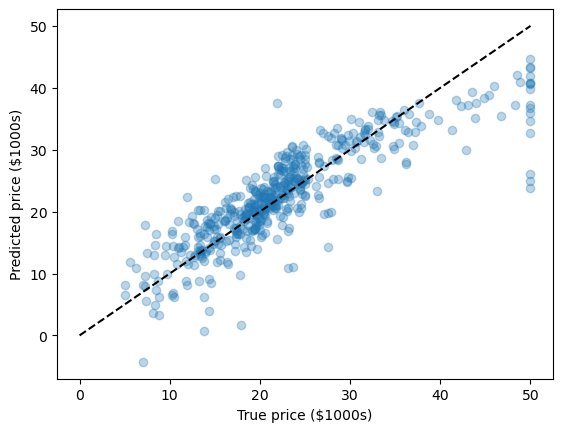

In [114]:
# Visualization of target and predicted responses
clf = lm.LinearRegression()
clf.fit(boston_data, boston_target)
predicted = clf.predict(boston_data)
print(clf.score(boston_data, boston_target))
plt.scatter(boston_target, predicted, alpha = 0.3)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')

<p style="font-size: 16px">The model appears to be a good fit except for more expensive housing, indicating further analysis may be required. </p>

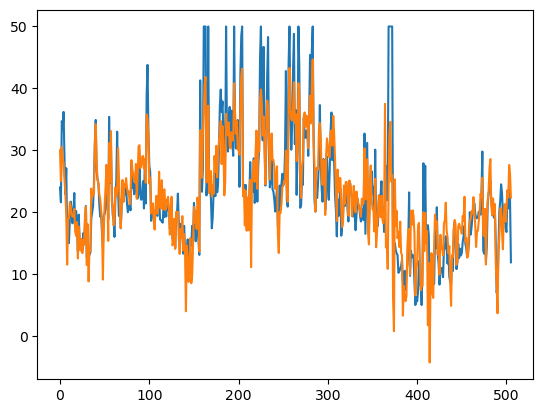

In [116]:
plt.plot(boston_target)
plt.plot(predicted)

_Last updated on 9.5.2025 22:56pm<br>
(C) 2025 Complex Adaptive Systems Laboratory, all rights reserved._